<a href="https://colab.research.google.com/github/Can-Berk/Machine_Learning_Labs/blob/main/WordCountProgram_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise 1: Build a Word Count Program with Pandas and Numpy**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import base64
import requests
import re
# import os
# os.chdir('C:/Users/user/Desktop')

## **Read the text document and plot the Histogram of the top 10 most occuring words**
Program should avoid stopwords

     times    wordname
2       38       https
64      30        gdoc
194     29       model
169     29          md
12      28   detection
122     26         com
0       24  tensorflow
46      23          we
11      20      object
207     19  evaluation


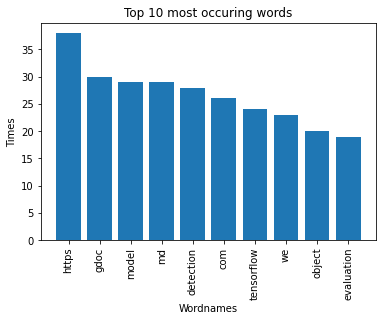

In [ ]:
# f = open("lab_text.txt", "r")
f=[]
url = "https://raw.githubusercontent.com/Can-Berk/Machine_Learning_Labs/main/Datasets/lab_text.txt"
f_ = requests.get(url, "r")
f_ = f_.text
for i in f_.split():
  f.append(i)

frequency=dict()
ignored_words=["a","an","be","the","to","for","on","of","with","b","and","in","x","not","e","c"]
for line in f:
    line=line.lower()
    line=re.sub('[^A-Za-z0-9]+', " ", line)
    line=re.sub(r'[0-9]+', '', line)
    words=line.rstrip()
    words=words.split()
    for i in words:
        if i in frequency:
            frequency[i]+=1
        else:
            if i in ignored_words:
                continue
            else:
                frequency[i]=1
                
list(frequency.items())[0:5]
r=list((frequency.items()))
df = pd.DataFrame(r)
df.columns=["wordname","times"]
df1=df.iloc[:, ::-1]
df1=df1.sort_values("times", ascending=False)
df1.head()
top10=df1.iloc[0:10,:]
print(top10)
fig = plt.figure()
plt.bar(top10.wordname,top10.times)
plt.xticks(range(len(top10)), top10.wordname,rotation=90)
plt.title("Top 10 most occuring words")
plt.xlabel("Wordnames")
plt.ylabel("Times")
plt.show()

## **Using numpy performe Matrix multiplications**
**Tasks:**\
1- Matrix A of dimensions 20x100 normal distribution  (2, 0.01)\
2- Vector v of dimension m × 1\
3- Iterative multiply (element-wise) each row of matrix A with vector v and sum
the result of each iteration in another vector c\
4- Find mean and standard deviation of the new vector c\
5- Plot histogram of vector c using 5 bins

mean of vector c= 19.847388867971596
standard deviation of vector c= 2.876397274777892


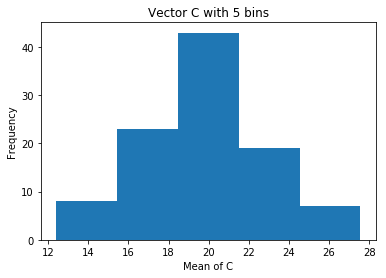

In [ ]:
A=np.random.random((100,20))
v=np.random.normal(2,0.01,(20,1))
c=np.zeros((100,1))
for i in range(A.shape[0]):
    sum=0
    for j in range(A.shape[1]):
        sum+=A[i,j]*v[j,0]
    c[i,0]=sum
print("mean of vector c=",c.mean())
print("standard deviation of vector c=",c.std())
plt.hist(c,bins=5)
plt.title("Vector C with 5 bins")
plt.xlabel("Mean of C")
plt.ylabel("Frequency")
plt.show()

# **Implement linear regression**
Tasks:\


*   Generate 3 sets of simple data with Matrix A with dimensions 100×2 with normal distribution (2, [0.01, 0.1, 1])
*   Implement Linear regression algorithm and train it using Matrix A to learn intercept(B0) and slope(B1)
*   Make predictions for each training example in matrix A and plot predictions

-0.1449463788916418
df1 optimal values: B1= -0.1449463788916418 and B0= 2.2892167076752714
df2 optimal values: B1= 0.01696524670186185 and B0= 1.9745137531179684
df3 optimal values: B1= 0.15273971793829674 and B0= 1.698391013533006


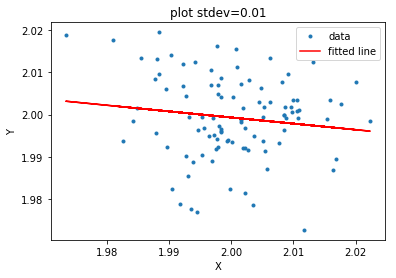

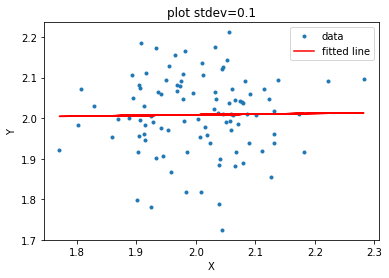

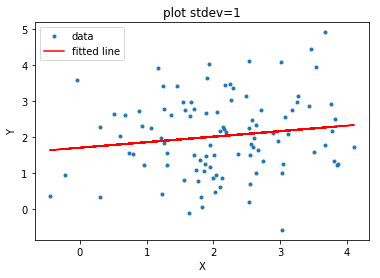

In [ ]:
one=np.random.normal(2,0.01,(100,2))
two=np.random.normal(2,0.1,(100,2))
three=np.random.normal(2,1,(100,2))

df1=pd.DataFrame(one)
df2=pd.DataFrame(two)
df3=pd.DataFrame(three)

def ave(x):
    return np.mean(x)
def B1calc(x,y):
    return ave((x-ave(x))*(y-ave(y)))/ave((x-ave(x))**2)
def B0calc(x,y):
    return ave(y)-B1calc(x,y)*ave(x)

df1_b1=B1calc(df1[0],df1[1])
print(df1_b1)
df1_b0=B0calc(df1[0],df1[1])
print("df1 optimal values:","B1=",df1_b1,"and B0=",df1_b0)
df2_b1=B1calc(df2[0],df2[1])
df2_b0=B0calc(df2[0],df2[1])
print("df2 optimal values:","B1=",df2_b1,"and B0=",df2_b0)
df3_b1=B1calc(df3[0],df3[1])
df3_b0=B0calc(df3[0],df3[1])
print("df3 optimal values:","B1=",df3_b1,"and B0=",df3_b0)

def pred(x,B0,B1):
    return B0+B1*x
y1p=pred(df1[0], df1_b0, df1_b1)
y2p=pred(df2[0], df2_b0, df2_b1)
y3p=pred(df3[0], df3_b0, df3_b1)

#1. plot
fig, ax = plt.subplots()
ax.plot(df1[0], df1[1],".",df1[0],y1p,"r")
plt.title('plot stdev=0.01')
plt.xlabel('X')
plt.ylabel('Y')
ax.legend(['data', 'fitted line'])
plt.show()

#2. plot
fig, ax = plt.subplots()
ax.plot(df2[0], df2[1],".",df2[0],y2p,"r")
plt.title('plot stdev=0.1')
plt.xlabel('X')
plt.ylabel('Y')
ax.legend(['data', 'fitted line'])
plt.show()

#3. plot
fig, ax = plt.subplots()
ax.plot(df3[0], df3[1],".",df3[0],y3p,"r")
plt.title('plot stdev=1')
plt.xlabel('X')
plt.ylabel('Y')
ax.legend(['data', 'fitted line'])
plt.show()

## **Consider the Intercept B0=0 and rerun the program to generate the predicted line with the varying stdev and then**
## **Consider the Slope B1=0 and rerun the program to generate the predicted line with the varying stdev**

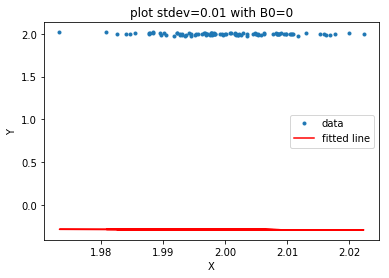

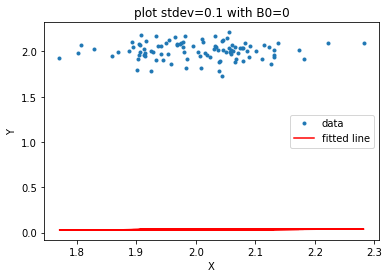

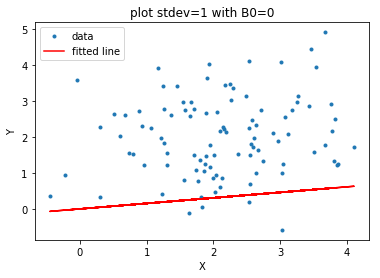

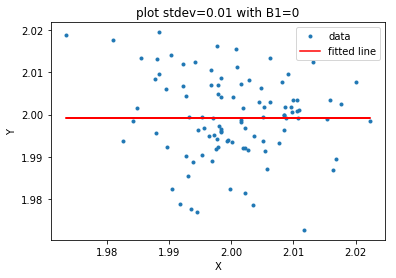

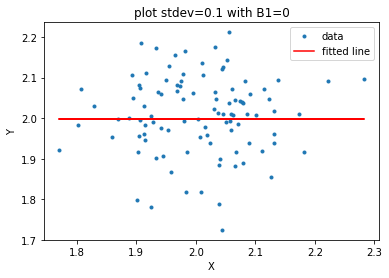

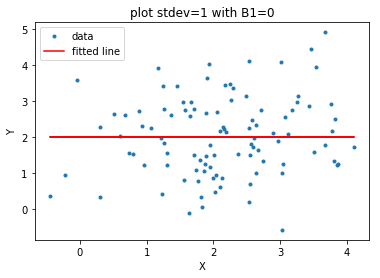

In [ ]:
# B0=0
df1_b1_2=B1calc(df1[0],df1[1])
df2_b1_2=B1calc(df2[0],df2[1])
df3_b1_2=B1calc(df3[0],df3[1])

B0=0
def pred2(x,B0,B1):
    return B0+B1*x

y1p2=pred2(df1[0], B0, df1_b1_2)
y2p2=pred2(df2[0], B0, df2_b1_2)
y3p2=pred2(df3[0], B0, df3_b1_2)

#1. plot
fig, ax = plt.subplots()
ax.plot(df1[0], df1[1],".",df1[0],y1p2,"r")
plt.title('plot stdev=0.01 with B0=0')
plt.xlabel('X')
plt.ylabel('Y')
ax.legend(['data', 'fitted line'])
plt.show()

#2. plot
fig, ax = plt.subplots()
ax.plot(df2[0], df2[1],".",df2[0],y2p2,"r")
plt.title('plot stdev=0.1 with B0=0')
plt.xlabel('X')
plt.ylabel('Y')
ax.legend(['data', 'fitted line'])
plt.show()

#3. plot
fig, ax = plt.subplots()
ax.plot(df3[0], df3[1],".",df3[0],y3p2,"r")
plt.title('plot stdev=1 with B0=0')
plt.xlabel('X')
plt.ylabel('Y')
ax.legend(['data', 'fitted line'])
plt.show()

#B1=0
B1=0
def B0calc2(x,y):
    return ave(y)-B1*ave(x)
df1_b0_2=B0calc2(df1[0],df1[1])
df2_b0_2=B0calc2(df2[0],df1[1])
df3_b0_2=B0calc2(df2[0],df1[1])

def pred3(x,B0,B1):
    return B0+B1*x
y1p3=pred3(df1[0], df1_b0_2, B1)
y2p3=pred3(df2[0], df2_b0_2, B1)
y3p3=pred3(df3[0], df3_b0_2, B1)

#1. plot
fig, ax = plt.subplots()
ax.plot(df1[0], df1[1],".",df1[0],y1p3,"r")
plt.title('plot stdev=0.01 with B1=0')
plt.xlabel('X')
plt.ylabel('Y')
ax.legend(['data', 'fitted line'])
plt.show()

#2. plot
fig, ax = plt.subplots()
ax.plot(df2[0], df2[1],".",df2[0],y2p3,"r")
plt.title('plot stdev=0.1 with B1=0')
plt.xlabel('X')
plt.ylabel('Y')
ax.legend(['data', 'fitted line'])
plt.show()

#3. plot
fig, ax = plt.subplots()
ax.plot(df3[0], df3[1],".",df3[0],y3p3,"r")
plt.title('plot stdev=1 with B1=0')
plt.xlabel('X')
plt.ylabel('Y')
ax.legend(['data', 'fitted line'])
plt.show()

# **Learn values of B0 and B1 with numpy.linalg lstsq**

In [ ]:
one_T=one[:,0].T
c=one[:,1].T
d=np.vstack([one_T, np.ones(len(one_T))]).T

two_T=two[:,0].T
e=two[:,1].T
f=np.vstack([two_T, np.ones(len(two_T))]).T

three_T=three[:,0].T
g=three[:,1].T
h=np.vstack([three_T, np.ones(len(three_T))]).T

m1,n1 =np.linalg.lstsq(d,c)[0]
print("for stdev=0.01 model parameters are:","B0=", n1, "B1=", m1)

m2,n2 =np.linalg.lstsq(f,e)[0]
print("for stdev=0.1 model parameters are:","B0=", n2, "B1=", m2)

m3,n3 =np.linalg.lstsq(h,g)[0]
print("for stdev=1 model parameters are:","B0=", n3, "B1=", m3)

for stdev=0.01 model parameters are: B0= 2.2892167076752794 B1= -0.14494637889164624
for stdev=0.1 model parameters are: B0= 1.9745137531179677 B1= 0.01696524670186209
for stdev=1 model parameters are: B0= 1.6983910135330063 B1= 0.15273971793829672


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  app.launch_new_instance()
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence 